In [2]:
from collections import Counter
import cPickle as pickle
import sys, os, time

In [3]:
def parse_tree_line(line):
    line = line.strip().split(' ')
    cl = line[0]
    paper_rank = float(line[1])
    paper_id = line[2].strip('"')
    return {
        'cl': cl,
        'paper_rank': paper_rank,
        'paper_id': paper_id
    }

In [4]:
fname = 'data/wos_one-based-numbering.tree'

In [4]:
%%time
c = Counter()
num_vertices = 219963473
i = 0
with open(fname, 'r') as f:
    for line in f:
        if line[0] == "#":
            continue
            
        item = parse_tree_line(line)
        cl = item['cl']
        cl = cl.split(':')[0]
        c[cl] += 1
    
        if (i in [1, 5, 10, 100, 1000, 10000, 100000, 1e6, 5e6, 10e6]) or (i % 50e6 == 0):
            print(i)
        i += 1

0
1
5
10
100
1000
10000
100000
1000000
5000000
10000000
50000000
100000000
150000000
200000000
CPU times: user 9min 28s, sys: 10.1 s, total: 9min 38s
Wall time: 18min 56s


In [5]:
c.most_common(10)

[('4193910', 104603717),
 ('4654150', 119752),
 ('6245469', 97902),
 ('5639372', 88305),
 ('7371898', 85981),
 ('6273522', 85794),
 ('1935800', 79509),
 ('1000491', 74676),
 ('6497556', 71522),
 ('808980', 65840)]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
with open('data/wos_relaxtree_cl_count.pickle', 'rb') as f:
    c = pickle.load(f)

In [8]:
randomstate = np.random.RandomState(seed=999)

In [9]:
df = pd.DataFrame.from_dict(c, orient='index')

In [10]:
df.sort_values(0, ascending=False).head()

,0
4193910,104603717
4654150,119752
6245469,97902
5639372,88305
7371898,85981


In [11]:
total = df[0].sum()
print('total: {}'.format(total))
num_clusters = df.shape[0]
print('num_clusters: {}'.format(num_clusters))
def print_stats(subset, label):
    num = subset.shape[0]
    num_papers = subset[0].sum()
    print('{}: {} ({:.1f}% of the clusters, {:.1f}% of the papers)'.format(label, num, float(num)/num_clusters*100, float(num_papers)/total*100))
# num_singletons = (df[0]==1).sum()
num_singletons = df[df[0]==1]
print_stats(num_singletons, 'num_singletons')
# print('num_singletons: {} ({:.1f}% of the clusters, {:.1f}% of the papers)'.format(num_singletons, float(num_singletons)/num_clusters*100, float(num_singletons)/total*100))
# num_morethan10 = (df[0]>10).sum()
num_morethan10 = df[df[0]>10]
print_stats(num_morethan10, 'number of clusters with more than 10 papers')

total: 219963473
num_clusters: 13041875
num_singletons: 7218400 (55.3% of the clusters, 3.3% of the papers)
number of clusters with more than 10 papers: 1094108 (8.4% of the clusters, 88.6% of the papers)


In [12]:
def print_stats_above_threshold(thresh, df=df, label=None):
    subset = df[df[0]>thresh]
    if not label:
        label = 'number of clusters with more than {} papers'.format(thresh)
    print_stats(subset, label)
for i in [1, 10, 100, 500, 1000, 10000, 100000]:
    print_stats_above_threshold(i)


number of clusters with more than 1 papers: 5823475 (44.7% of the clusters, 96.7% of the papers)
number of clusters with more than 10 papers: 1094108 (8.4% of the clusters, 88.6% of the papers)
number of clusters with more than 100 papers: 86330 (0.7% of the clusters, 77.8% of the papers)
number of clusters with more than 500 papers: 24241 (0.2% of the clusters, 71.9% of the papers)
number of clusters with more than 1000 papers: 13171 (0.1% of the clusters, 68.3% of the papers)
number of clusters with more than 10000 papers: 697 (0.0% of the clusters, 53.8% of the papers)
number of clusters with more than 100000 papers: 2 (0.0% of the clusters, 47.6% of the papers)


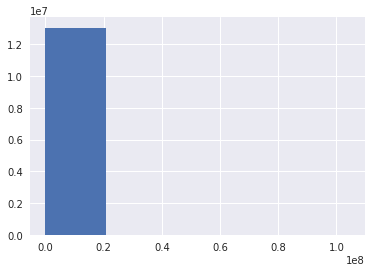

In [59]:
df = df.rename(columns={0: 'cluster_size'})
fig, ax = plt.subplots()

ax.hist(df.cluster_size, bins=5)

plt.show()

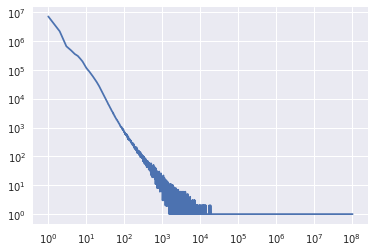

In [68]:
size_count_data = df.cluster_size.value_counts().sort_index()
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(size_count_data.index.tolist(), size_count_data.values)

In [12]:
counter_fname = 'data/wos_relaxtree_cl_count.pickle'

In [13]:
# %%time
# with open(counter_fname, 'wb') as f:
#     pickle.dump(c, f, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
def write_biggest_clusters_to_csv(c, N=100, outfname=None, sep=','):
    if not outfname:
        outfname = 'biggest_{}_clusters.csv'.format(N)
    
    with open(outfname, 'w') as outf:
        outf.write(sep.join(['cl_name', 'num_nodes']))
        outf.write('\n')
        for item in c.most_common(N):
            outf.write(sep.join(str(x) for x in item))
            outf.write('\n')
# write_biggest_clusters_to_csv(c, N=100)

In [35]:
cluster_size_10 = df[df[0]==10]
testcl = cluster_size_10.sample(n=1, random_state=randomstate)[0]

In [42]:
testcl_name = testcl.index[0]

In [44]:
pjk_fname = '../tr/wos_one-based-numbering.net'
clu_fname = 'data/wos_one-based-numbering.clu'

In [50]:
%%time
testcl_linenos = []
with open(clu_fname, 'r') as f:
    i = 0
    for line in f:
#         if line.strip() == testcl_name:
        if line.strip() == '8':
            testcl_linenos.append(i)
        i += 1
        if i > 100:
            break

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 64.8 µs


In [51]:
testcl_linenos

[5, 6, 7, 8]

In [53]:
df.loc['8']

0    3
Name: 8, dtype: int64

In [59]:
%%time
i = 0
with open('data/wos_one-based-numbering.tree', 'r') as f:
    for line in f:
        if line[0] == "#":
            continue
            
        item = parse_tree_line(line)
        cl = item['cl']
        cl = cl.split(':')[0]
        if cl == '8':
            print(i)
            print(item)
            print("")
        i += 1

76
{'paper_rank': 3.33213e-09, 'paper_id': 'WOS:000201758600083', 'cl': '8:1'}

77
{'paper_rank': 4.74828e-09, 'paper_id': 'WOS:000201758600083.2', 'cl': '8:2'}

78
{'paper_rank': 4.74828e-09, 'paper_id': 'WOS:000201758600083.1', 'cl': '8:3'}



KeyboardInterrupt: 

In [60]:
c['8']

3

In [61]:
pjk_index = [5,6,7,8]  # These papers are '8' in the .clu file
paper_ids = []
with open('../tr/wos_one-based-numbering.net', 'r') as f:
    i = 0
    for line in f:
        i += 1
        if line[0] == '*':
            continue
        line = line.strip().split(' ')
        idx = int(line[0])
        if idx in pjk_index:
            paper_ids.append(line[1])
        if i > 100:
            break

In [72]:
paper_ids = [x.strip('"') for x in paper_ids]

In [74]:
%%time
i = 0
tree_items = []
with open('data/wos_one-based-numbering.tree', 'r') as f:
    for line in f:
        if line[0] == "#":
            continue
            
        item = parse_tree_line(line)
        paper_id = item['paper_id']
        if paper_id in paper_ids:
            tree_items.append(item)
            
        i += 1
        if len(tree_items) == 4:
            break

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.98 ms


In [75]:
tree_items
# they are in cluster '2'. Why are they '8' in the .clu file?

[{'cl': '2:1', 'paper_id': 'WOS:000200960600144', 'paper_rank': 3.33213e-09},
 {'cl': '2:2',
  'paper_id': 'WOS:000202637300042.12',
  'paper_rank': 7.52513e-09},
 {'cl': '2:3', 'paper_id': 'WOS:000200960600144.2', 'paper_rank': 4.38194e-09},
 {'cl': '2:4', 'paper_id': 'WOS:000200960600144.1', 'paper_rank': 4.27623e-09}]

In [81]:
df.sort_values(0, ascending=False).head()

,0
4193910,104603717
4654150,119752
6245469,97902
5639372,88305
7371898,85981


In [93]:
# let's try to get a pajek (.net) file for the fifth biggest cluster
test_cluster_name = '7371898'
test_cluster_name

'7371898'

In [94]:
# %%time
paper_ids = []
with open(fname, 'r') as f:  #open tree file
    i = 0
    num_in_test_cluster = c[test_cluster_name]
    for line in f:
        if line[0] == '*':
            continue
        if line[:len(test_cluster_name)] == test_cluster_name:
            paperid = line.strip().split(' ')[2]
            paperid = paperid.strip('"')
            paper_ids.append(paperid)
            
            if len(paper_ids) == num_in_test_cluster:
                break
       
        
        if (i in [1, 5, 10, 100, 1000, 10000, 100000, 1e6, 5e6, 10e6]) or (i % 50e6 == 0):
            print("{}, len(paper_ids) == {}".format(i, len(paper_ids)))
        i += 1

0, len(paper_ids) == 0
1, len(paper_ids) == 0
5, len(paper_ids) == 0
10, len(paper_ids) == 0
100, len(paper_ids) == 0
1000, len(paper_ids) == 0
10000, len(paper_ids) == 0
100000, len(paper_ids) == 0
1000000, len(paper_ids) == 0
5000000, len(paper_ids) == 0
10000000, len(paper_ids) == 0
50000000, len(paper_ids) == 0
100000000, len(paper_ids) == 0
150000000, len(paper_ids) == 0
CPU times: user 2min 10s, sys: 2.94 s, total: 2min 13s
Wall time: 3min 42s
Parser   : 1.11 s


In [96]:
print(len(paper_ids))
paper_ids = set(paper_ids)
print(len(paper_ids))

85981
85981


In [105]:
# %%time
lines = {
    'vertices': [],
    'edges': []
}
paper_indices = []
with open(pjk_fname, 'r') as f:
    i = 0
    mode = ''
    for line in f:
        if line[0] == '*':
            if line[1].lower() == 'v':
                print(line)
                print("mode: v")
                print("")
                mode = 'v'
            elif line[1].lower() in ['a', 'e']:
                print(line)
                print("mode: e")
                print("")
                paper_indices = set(paper_indices)  # should make lookup more efficient
                mode = 'e'
            continue
        
        if mode == 'v':
            items = line.strip().split(' ')
            paper_index = items[0]
            paper_id = items[1].strip('"')
            if paper_id in paper_ids:
                paper_indices.append(paper_index)
                lines['vertices'].append(line)
        elif mode == 'e':
            # edges
            items = line.strip().split(' ')
            citing_index = items[0]
            ;
            if citing_index in paper_indices:
                cited_index = items[1]
                if cited_index in paper_indices:
                    lines['edges'].append(line)
        i += 1
print(len(lines['vertices']))
print(len(lines['edges']))

*vertices 219963473

mode: v

*edges 1034566885

mode: e

85981
1003129
CPU times: user 17min 13s, sys: 11.4 s, total: 17min 25s
Wall time: 26min 22s


In [108]:
outfname = 'wos_cluster_{}.net'.format(test_cluster_name)

In [109]:
outfname

'wos_cluster_7371898.net'

In [111]:
# %%time
with open(os.path.join('data', outfname), 'w') as outf:
    num_vertices = len(lines['vertices'])
    print("writing {} vertices".format(num_vertices))
    outf.write('*vertices {}\n'.format(num_vertices))
    for line in lines['vertices']:
        outf.write(line)
    
    num_edges = len(lines['edges'])
    print("writing {} arcs".format(num_edges))
    outf.write('*arcs {}\n'.format(num_edges))
    for line in lines['edges']:
        outf.write(line)

writing 85981 vertices
writing 1003129 arcs
CPU times: user 248 ms, sys: 24 ms, total: 272 ms
Wall time: 537 ms
